# DSE 200X_Comparison of Regression methods for House price prediction
## Predict house price using regression

This dataset https://www.kaggle.com/harlfoxem/housesalesprediction is taken from Kaggle and contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Read input files

In [2]:
df = pd.read_csv('./Downloads/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The dataset has 21613 rows of house sales data and 21 columns. There is no missing value in the dataset.

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Find the number of unique entries in each column
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### Classify the variables into 4 categories.
* Continuous variables: A numeric variable that takes any value between a certain set of real numbers.
* Discrete variables: A numeric variable that can only take distinct and separate values.
* Nominal variables:A categorical variable  which has no order.
* Ordinal variables: A categorical variable whose value can be logically ordered or ranked.

In [6]:
continuous_variables = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
discrete_variables = ['yr_built', 'yr_renovated']
nominal_variables = ['lat', 'long', 'zipcode']
ordinal_variables = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

### Distribution of target variable : sales price

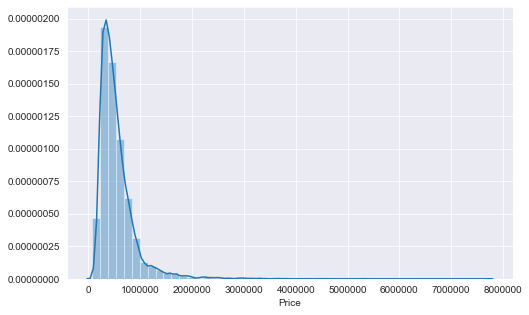

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize =(8,5))
sns.distplot(df['price'], axlabel = 'Price')

In [8]:
print('Skewness : %f' % df['price'].skew())
print('Kurtosis : %f' % df['price'].kurt())

Skewness : 4.024069
Kurtosis : 34.585540


Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution. The above distribution curve shows a positive skewness. ie, the peak of the distribution curve is less than the average value. This may be an indication that many houses are sold at less than the average value. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. High Kurtosis (34.585540) in this case may be because of outliers present in the data.

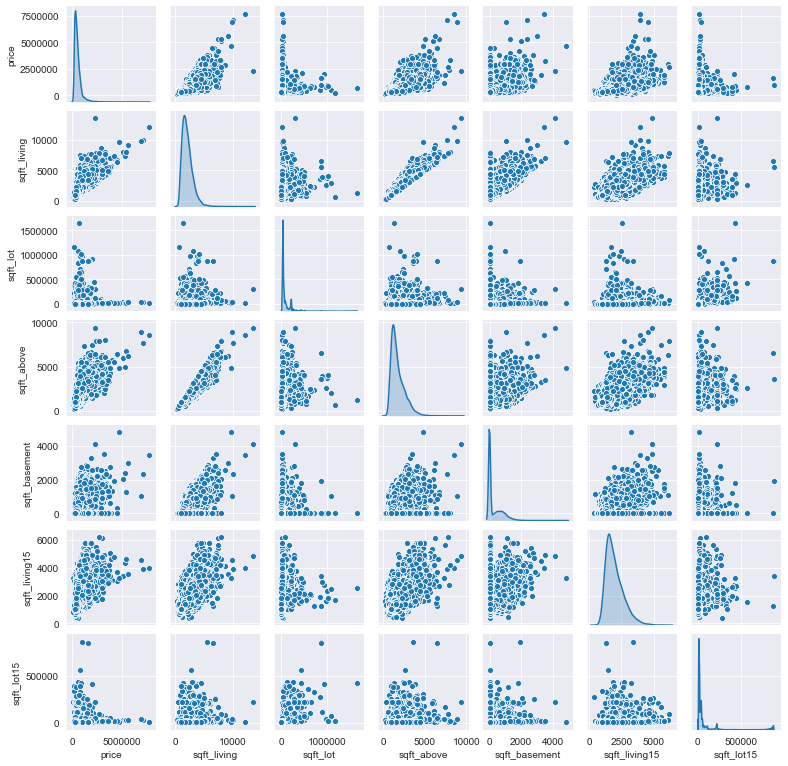

In [9]:
sns.pairplot(df[continuous_variables], height = 1.5 ,kind ='scatter', diag_kind='kde') 


Almost all the continuous variables show a positive skewness. Variables 'sqft_above' and 'sqft_living' are almost linearly related.

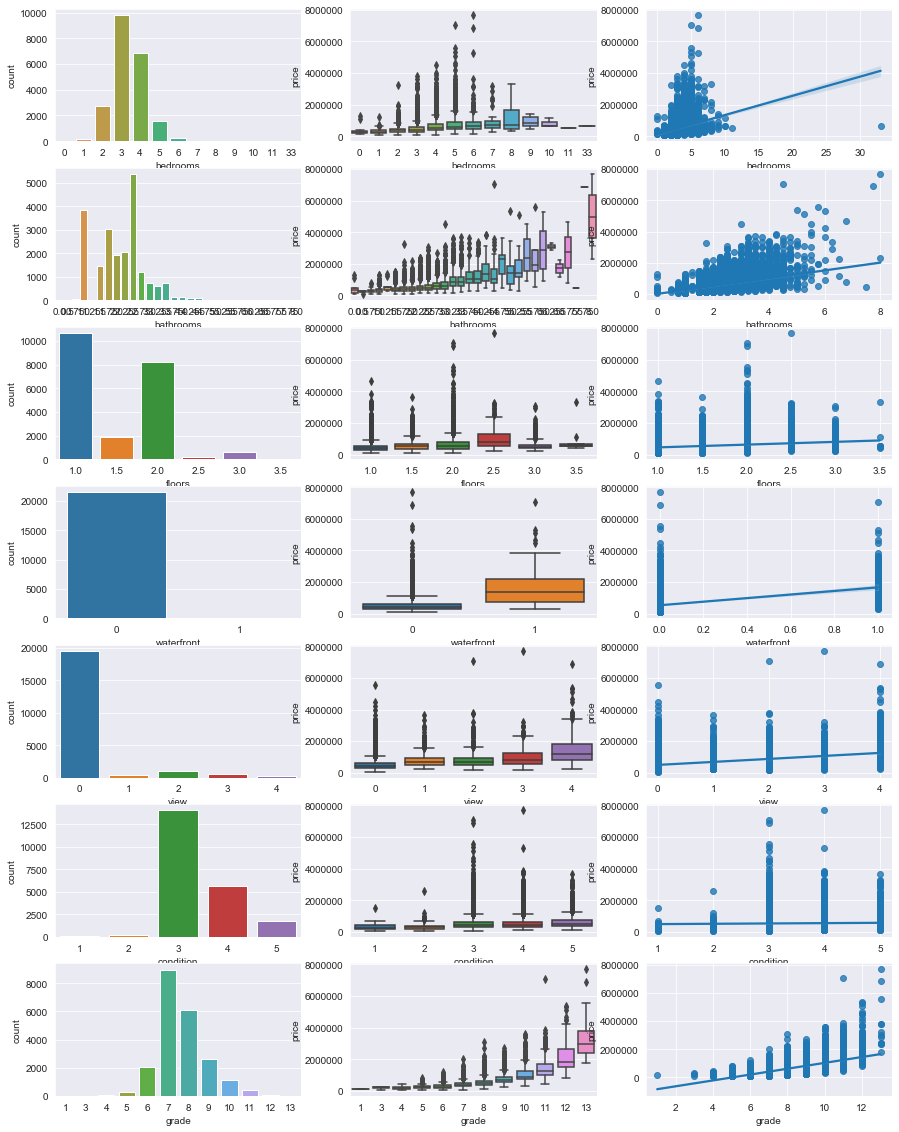

In [10]:
fig, ax = plt.subplots(7, 3, figsize=(15,20))

for i, el in enumerate(ordinal_variables):
    feature_count = df[el].value_counts()
    sns.set_style("darkgrid")
    sns.countplot(x=el, data=df,  ax=ax[i,0])
    sns.boxplot(x=el, y= 'price',data=df, ax=ax[i,1])
    sns.regplot(x=el, y= 'price',data=df,  ax=ax[i,2])
    
plt.show()    


#### Observations
* Bedrooms & Bathrooms:The median house price is going up with increase in the number of bedrooms (upto 7) and bathrooms (upto 5). Thereafter it doesn't show a linear trend.
* Floors: The median house price increases with an increase in the number of floors (upto 2.5)
* Waterfront: The houses with waterfront are priced higher.
* View: The better the view, the higher the price.
* Condition: The median price for condition 3, 4 and 5 remains almost the same, though price for condition 1 & 2 houses are slightly lower.
* Grade: The median house price increases almost exponentially with increase in grade.

### House age vs. house price.

In [11]:
df1 = df.copy() 
df1.drop(['id','date'], axis = 1, inplace=True)
df1['yrs_old_renovated'] = np.where(df1['yr_renovated']!= 0, 2015 - df1['yr_renovated'], 2015 - df1['yr_built'])
df1['yrs_old_bins'] = pd.cut(x = df1['yrs_old_renovated'], bins = [-1, 20, 40, 60, 80, 100, 120])
df1['price_bins'] = pd.cut(x = df1['price'], bins = [0, 1e6, 2e6, 3e6, 4e6, 5e6, 6e6, 7e6, 8e6])
df1.head()         

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old_renovated,yrs_old_bins,price_bins
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,60,"(40, 60]","(0.0, 1000000.0]"
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,24,"(20, 40]","(0.0, 1000000.0]"
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,82,"(80, 100]","(0.0, 1000000.0]"
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,50,"(40, 60]","(0.0, 1000000.0]"
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,28,"(20, 40]","(0.0, 1000000.0]"


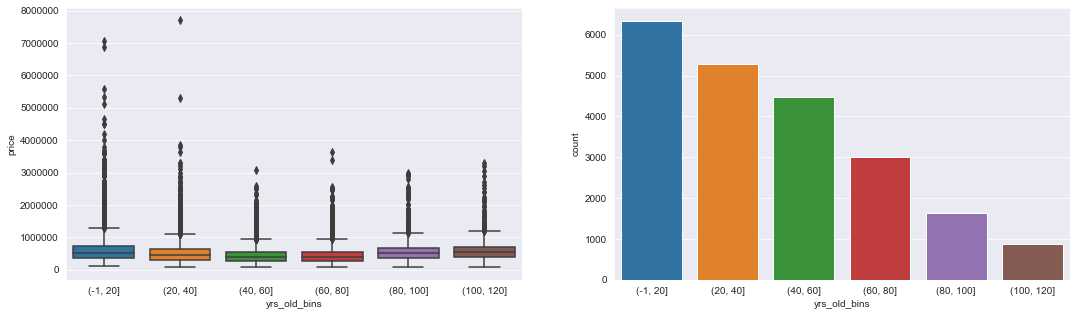

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5))
sns.boxplot(x='yrs_old_bins', y= 'price', data=df1, ax=ax[0])
sns.countplot(x='yrs_old_bins', data=df1, ax=ax[1])
plt.show()

There is not much change in the median house price with aging. So we will discard yr_built and yr_renovated features from the training data. 

Let's have a look at the 33 bedroom house and compare it with mean and median values of the dataset.

In [13]:
df[(df['bedrooms'] == 33)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


It looks like there is some error in the data as it is illogical to have a 33 bedroom single story house on 6000 sqft_lot and with only 1.75 bathrooms. So I'm dropping this row.

In [14]:
df1.drop(df1[df1['bedrooms'] == 33].index, axis = 0, inplace = True)

### Geographical location vs. house price

C:\Users\vijis\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\vijis\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1080 with 0 Axes>

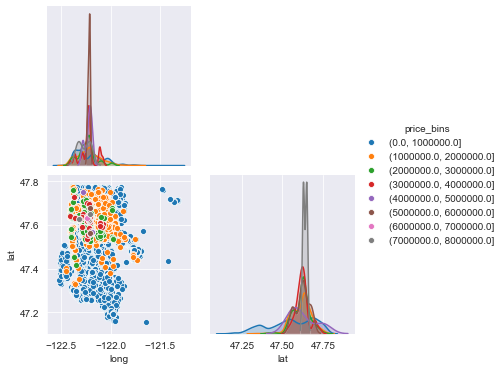

In [15]:
plt.figure(figsize=(20,15))
g = sns.pairplot(data=df1[['long','lat','price_bins']], hue='price_bins', corner=True )

The above scatter plot is almost the shape of King County. It can be seen that higher priced houses are located in some specific regions, especially near the coasts.  Specifically, the high priced houses are located between latitudes of $47.5^{o}$ and $47.7^{o}$ and longitudes of $-122.0^{o}$ and $-122.4^{o}$. This information may be helpful for a homebuyer when making a purchase decision. This also indicates that geographical location (latitude, longitude) is a key factor that decides house price.

### Correlation between variables

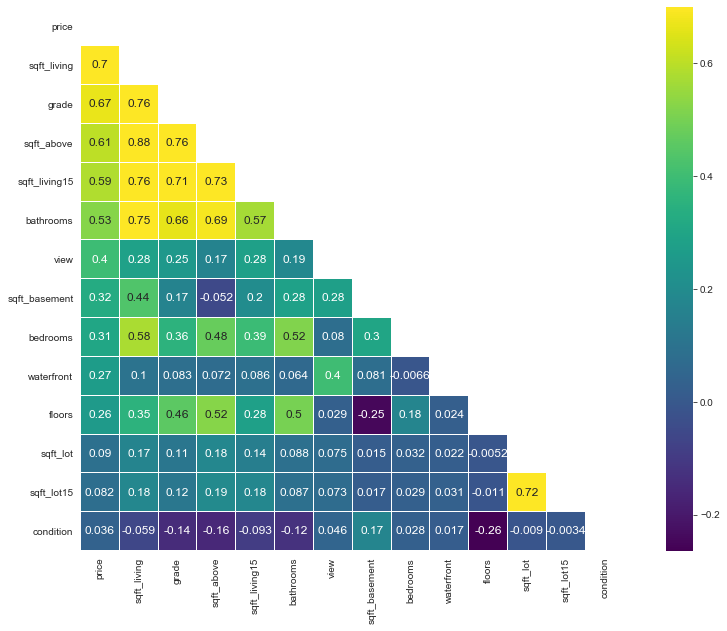

In [16]:
features = continuous_variables +  ordinal_variables 
k= len(features)
cols = df1[features].corr().nlargest(k,'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
mask = np.zeros_like(df1[cols].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(cm, cmap='viridis', mask=mask, vmax=.7, linewidths=0.01, annot = True, square=True, 
                    linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

## Feature selection
Here we select the variables which are highly correlated with our target variable, price. Let's choose the top 10 varaibles - 'sqft_living',  'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'waterfront', 'floors'. 

'sqft_living' and 'sqft_above' are highly correlated with a correlation coefficient of 0.88. So keeping one of this variable in the training set is sufficient. 'sqft_living' has a higher correlation with 'price' than 'sqft_above'. Therefore, we will keep 'sqft_living' in the training feature. Also, we will add the geographical location parameters, 'lat' and 'long' in the training features.  

In [17]:
selected_features = ['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
                     'waterfront', 'floors', 'long', 'lat']
target = ['price']
X = df[selected_features]
y = np.ravel(df[target])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

## 1. Multiple Linear Regression

Multiple linear regression (MLR) attempts to model a linear relationship between the several explanatory (independent) variables and the response (dependent) variable. Here we use all the selected independent training variables to predict the house price.

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
mae = mean_absolute_error(y_test, y_prediction)
r2score = r2_score(y_test, y_prediction)
            
print('RMSE:', RMSE)
print('MAE:' ,mae )
print('R2score:', r2score)

RMSE: 208974.06610008978
MAE: 133365.20097731653
R2score: 0.675963115586444


### True Value vs. Predicted value for Multiple Linear Regression model

Text(0.5, 1.0, 'Multiple Linear Regression predictions for the test data')

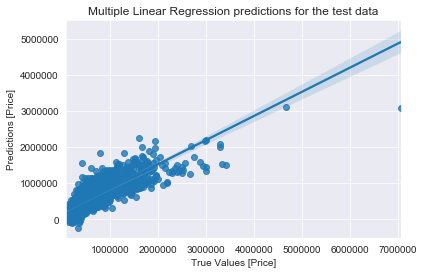

In [20]:
sns.regplot(x=y_test, y=  y_prediction)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.title('Multiple Linear Regression predictions for the test data')

## 2. Decision Tree Regression

   max_depth       RMSE        MAE  r2score
0          5  197738.11  113512.93     0.71
1         10  165407.15   88514.64     0.80
2         15  178910.89   92964.29     0.76
3         20  189354.61   99370.01     0.73
4         25  188644.19  101403.71     0.74
5         30  178732.86  100080.28     0.76
6         35  182904.86  100619.37     0.75
7         40  185296.70  100791.27     0.75
8         45  185296.70  100791.27     0.75
9         50  185296.70  100791.27     0.75


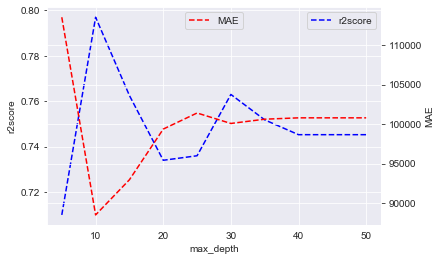

In [21]:
max_depth = [5,10,15,20,25,30,35,40,45,50]
RMSE = []
mae = []
r2score = []
for n in max_depth:
    regressor = DecisionTreeRegressor(max_depth = n, random_state = 100)
    regressor.fit(X_train, y_train)
    y_prediction = regressor.predict(X_test)
    RMSE.append(sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction)))
    mae.append(mean_absolute_error(y_test, y_prediction))
    r2score.append(r2_score(y_test, y_prediction))
    
DTRegressor_results = pd.DataFrame({'max_depth':max_depth,'RMSE':RMSE, 'MAE': mae, 'r2score':r2score})

print(DTRegressor_results.round(2))

fig, ax1 = plt.subplots()
ax1.plot(DTRegressor_results['max_depth'], DTRegressor_results['r2score'], 'b--')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('r2score')
ax1.legend(['r2score'], loc ="upper right")
ax2 = ax1.twinx()
ax2.plot(DTRegressor_results['max_depth'], DTRegressor_results['MAE'], 'r--')
ax2.set_ylabel('MAE')
ax2.legend(['MAE'],loc ="upper center") 
plt.show()


The best fitting model in this case has an r2score of 0.80 and MAE of 88514.64 with max_depth = 10.

### True Value vs. Predicted value for the best fitting Decision Tree Regression model

Text(0.5, 1.0, 'Decision Tree Regression predictions for the test data')

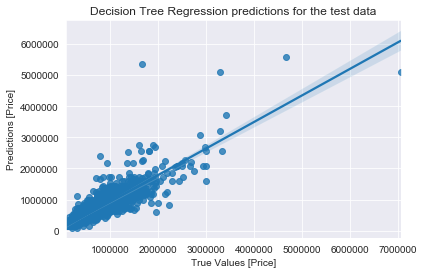

In [22]:
sns.regplot(x=y_test, y=  DecisionTreeRegressor(max_depth = 10, random_state = 100).fit(X_train, y_train).predict(X_test))
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.title('Decision Tree Regression predictions for the test data')

## 3. Random Forest Regression

   n_estimators        RMSE        MAE  r2score
0             5  143920.145  80161.515    0.846
1            10  138789.519  76253.773    0.857
2            15  135135.123  74162.498    0.864
3            20  133648.282  73687.905    0.867
4            25  131788.472  72999.800    0.871
5            30  131226.704  72619.218    0.872
6            35  130019.491  72299.711    0.875
7            40  128573.022  71879.346    0.877
8            45  129563.984  71974.844    0.875
9            50  128841.409  71944.298    0.877


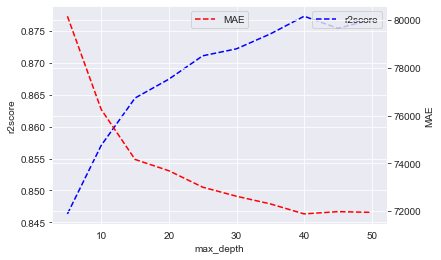

In [23]:
n_estimators = [5,10,15,20,25,30, 35, 40, 45, 50]
RMSE = []
mae = []
r2score = []
for n in n_estimators:
    regressor = RandomForestRegressor(n_estimators = n, random_state = 100)
    regressor.fit(X_train, y_train)
    y_prediction = regressor.predict(X_test)
    RMSE.append(sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction)))
    mae.append(mean_absolute_error(y_test, y_prediction))
    r2score.append(r2_score(y_test, y_prediction))
    
RFRegression_results = pd.DataFrame({'n_estimators':n_estimators,'RMSE':RMSE, 'MAE': mae, 'r2score':r2score})

print(RFRegression_results.round(3))

fig, ax1 = plt.subplots()
ax1.plot(RFRegression_results['n_estimators'], RFRegression_results['r2score'], 'b--')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('r2score')
ax1.legend(['r2score'], loc ="upper right")
ax2 = ax1.twinx()
ax2.plot(RFRegression_results['n_estimators'], RFRegression_results['MAE'], 'r--')
ax2.set_ylabel('MAE')
ax2.legend(['MAE'],loc ="upper center") 
plt.show()


The best fitting model in this case has an r2score of 0.877 and  MAE of 71879.346 with n_estimators = 40. 

### True Value vs. Predicted value for the best fitting Random Forest Regression model

Text(0, 0.5, 'Predictions [Price]')

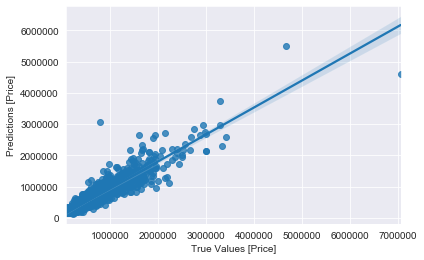

In [24]:
sns.regplot(x=y_test, y= RandomForestRegressor(n_estimators = 50, random_state = 0).fit(X_train, y_train).predict(X_test))
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')

## Comparing the different regressor models

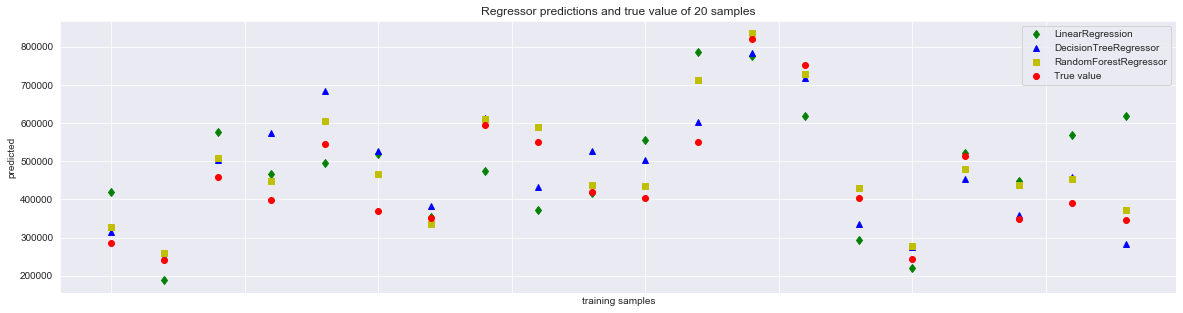

In [25]:
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(max_depth = 10,  random_state = 100)
reg3 = RandomForestRegressor(n_estimators = 40, random_state = 100)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

pred1 = reg1.predict(X_test[:20])
pred2 = reg2.predict(X_test[:20])
pred3 = reg3.predict(X_test[:20])


plt.figure(figsize=(20,5))
plt.plot(pred1, 'gd', label='LinearRegression')
plt.plot(pred2, 'b^', label='DecisionTreeRegressor')
plt.plot(pred3, 'ys', label='RandomForestRegressor')
plt.plot(y_test[:20], 'ro', label = 'True value')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and true value of 20 samples')

plt.show()

The above graph shows the house price predictions with the different regressor models used and the actual price for the first 20 samples in the test dataset.

The highest r2score (0.877) is obtained with Random Forest Regression model. 